In [1]:
import numpy as np

np.random.seed(10)
X_1 = np.random.normal(loc = 3, scale = 3, size = 100)
X_2 = np.random.normal(loc = 4, scale = 2, size = 100)

sample = []
for ind in range(len(X_1)):
    sample.append([X_1[ind], 0.5*X_1[ind] + X_2[ind]])
sample = np.array(sample)

# Question 1

In [2]:
mean = np.mean(sample, axis = 0)
mean

array([3.23824999, 5.75751936])

# Question 2

In [3]:
cov = np.cov(sample, rowvar=False)
cov

array([[8.50150318, 4.62655915],
       [4.62655915, 6.42395033]])

# Question 3

In [4]:
eigen_values, eigen_vectors = np.linalg.eig(np.cov(sample, rowvar=False))
print('Eigenvalues are:', eigen_values)
print('Eigenvectors are:', eigen_vectors)

Eigenvalues are: [12.20446758  2.72098593]
Eigenvectors are: [[ 0.78072745 -0.62487171]
 [ 0.62487171  0.78072745]]


# Question 4

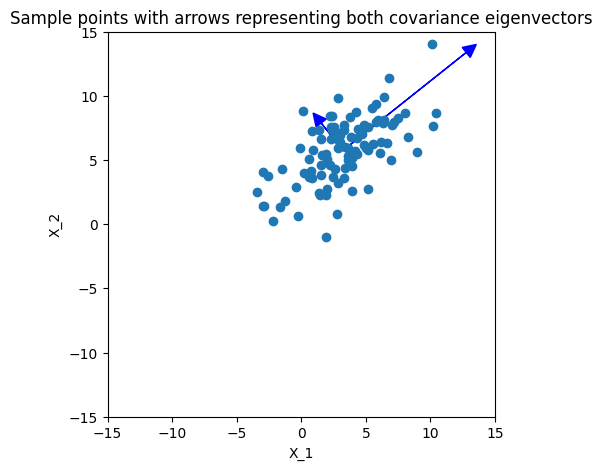

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(sample[:, 0], sample[:, 1], 'o')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.arrow(mean[0], mean[1], eigen_vectors[0][0]*eigen_values[0], eigen_vectors[1][0]*eigen_values[0], head_width=1, head_length=1, fc='b', ec='b')
plt.arrow(mean[0], mean[1], eigen_vectors[0][1]*eigen_values[1], eigen_vectors[1][1]*eigen_values[1], head_width=1, head_length=1, fc='b', ec='b')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Sample points with arrows representing both covariance eigenvectors');


# Question 5

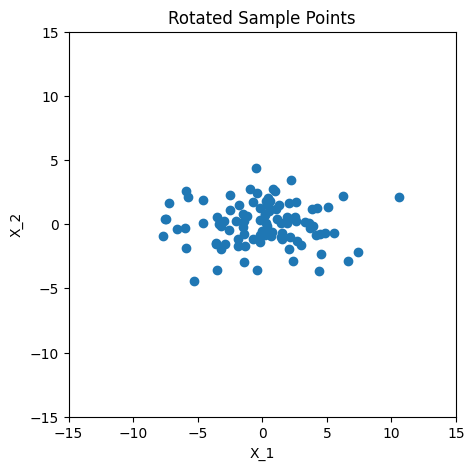

In [6]:
v1_norm = eigen_vectors[0]/np.linalg.norm(eigen_vectors[0], ord = 2)
v2_norm = eigen_vectors[1]/np.linalg.norm(eigen_vectors[1], ord = 2)
U = np.array([v1_norm, v2_norm])

sample_rotated = (U.T @ (sample - mean).T).T
plt.figure(figsize=(5,5))
plt.plot(sample_rotated[:, 0], sample_rotated[:, 1], 'o')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Rotated Sample Points');